# Assignment 

In this assignment, we will creating a __Nearest Neighbors__ algorithm which find the closest (or nearest) known observation in our training data and use that value to make our prediction. Similar to a classifier, the interest outcome is category. 

We can implement a KNN model by following the below steps:

* Load the data
* Initialise the value of k
* For getting the predicted class, iterate from 1 to total number of training data points
    * Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
    * Sort the calculated distances in ascending order based on distance values
    * Get top k rows from the sorted array
    * Get the most frequent class of these rows
    * Return the predicted class

In [1]:
# Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

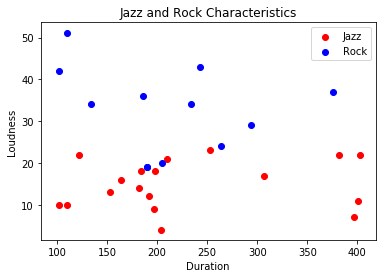

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0])

In [4]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]


## Challenge: Implement the Nearest Neighbor algorithm 

The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.

First, we will calculate the distance between test data and each row of training data by using the Eclidean distance formula. 

In [5]:
#Euclidean Distance function.

def euclidean_dist(test, train):
    #test and train are n x m arrays
    distances = []
    for i in range(len(test)):
        distance = np.sqrt(np.sum(np.square(test[i] - train), axis=1))
        distances.append(distance)
    return distances

In [6]:
train = X
#X is 30 x 2
test = [[140, 30], [20,30]]
Y_test = [1, 1]
#test is 2 x 2

euclidean_dist(test, train)

[0     196.468827
 1     148.499158
 2     234.047004
 3     187.488666
 4     149.626201
 5     212.249853
 6     286.386103
 7     371.251936
 8     148.606864
 9     261.174271
 10    212.190952
 11    152.643375
 12    303.080847
 13    119.670381
 14    390.356248
 15    176.799321
 16    200.601595
 17    206.465493
 18    215.779981
 19    391.219887
 20    182.570534
 21    207.624661
 22    220.843836
 23    251.829307
 24    229.895628
 25    200.601595
 26    197.433533
 27    392.787474
 28    361.005540
 29    121.605921
 dtype: float64, 0     154.012986
 1     104.938077
 2     214.238185
 3     156.818366
 4      92.021737
 5     167.361883
 6     264.153365
 7     352.005682
 8      72.691127
 9     234.034186
 10    175.000000
 11     80.622577
 12    277.016245
 13     85.796270
 14    367.230173
 15    123.199026
 16    160.003125
 17    162.197411
 18    180.002778
 19    373.005362
 20    134.059688
 21    168.011904
 22    174.734084
 23    223.020178
 24    204.4

Next, we will get top k rows from the sorted array.

In [7]:
# Get neighbors

def get_neighbors(X_train, X_test, Y_train, k):
    neighbors_arrays = np.argsort(euclidean_dist(X_test, X_train))
    votes = []
    for item in neighbors_arrays:
        targs = []
        for i in range(k):
            index = item[i]
            targs.append(Y_train[index])
        votes.append(np.median(targs))
    return(votes)

In [8]:
print(get_neighbors(train, test, Y, 3))

[0.0, 1.0]


Finally, we will get the most frequent class of these rows and return predicted class.

In [9]:
# KNN class 

def knn_class(X_train, X_test, Y_train, Y_test, k):
    predictions = pd.DataFrame(get_neighbors(X_train, X_test, Y_train, k), index=X_test, columns=['prediction'])
    predictions['target'] = Y_test
    return(predictions)

In [10]:
knn_class(train, test, Y, Y_test, 3)

,,prediction,target
140,20,0.0,1
30,30,1.0,1
